In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
Happy = pd.read_csv("C:/Users/Dell/Downloads/happiness_score_dataset.csv")

In [3]:
Happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
Happy=Happy.drop(['Country','Region'], axis=1)

In [5]:
Happy

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [6]:
Happy.shape

(158, 10)

In [7]:
Happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 158 non-null    int64  
 1   Happiness Score                158 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 12.5 KB


In [8]:
Happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
Happy.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

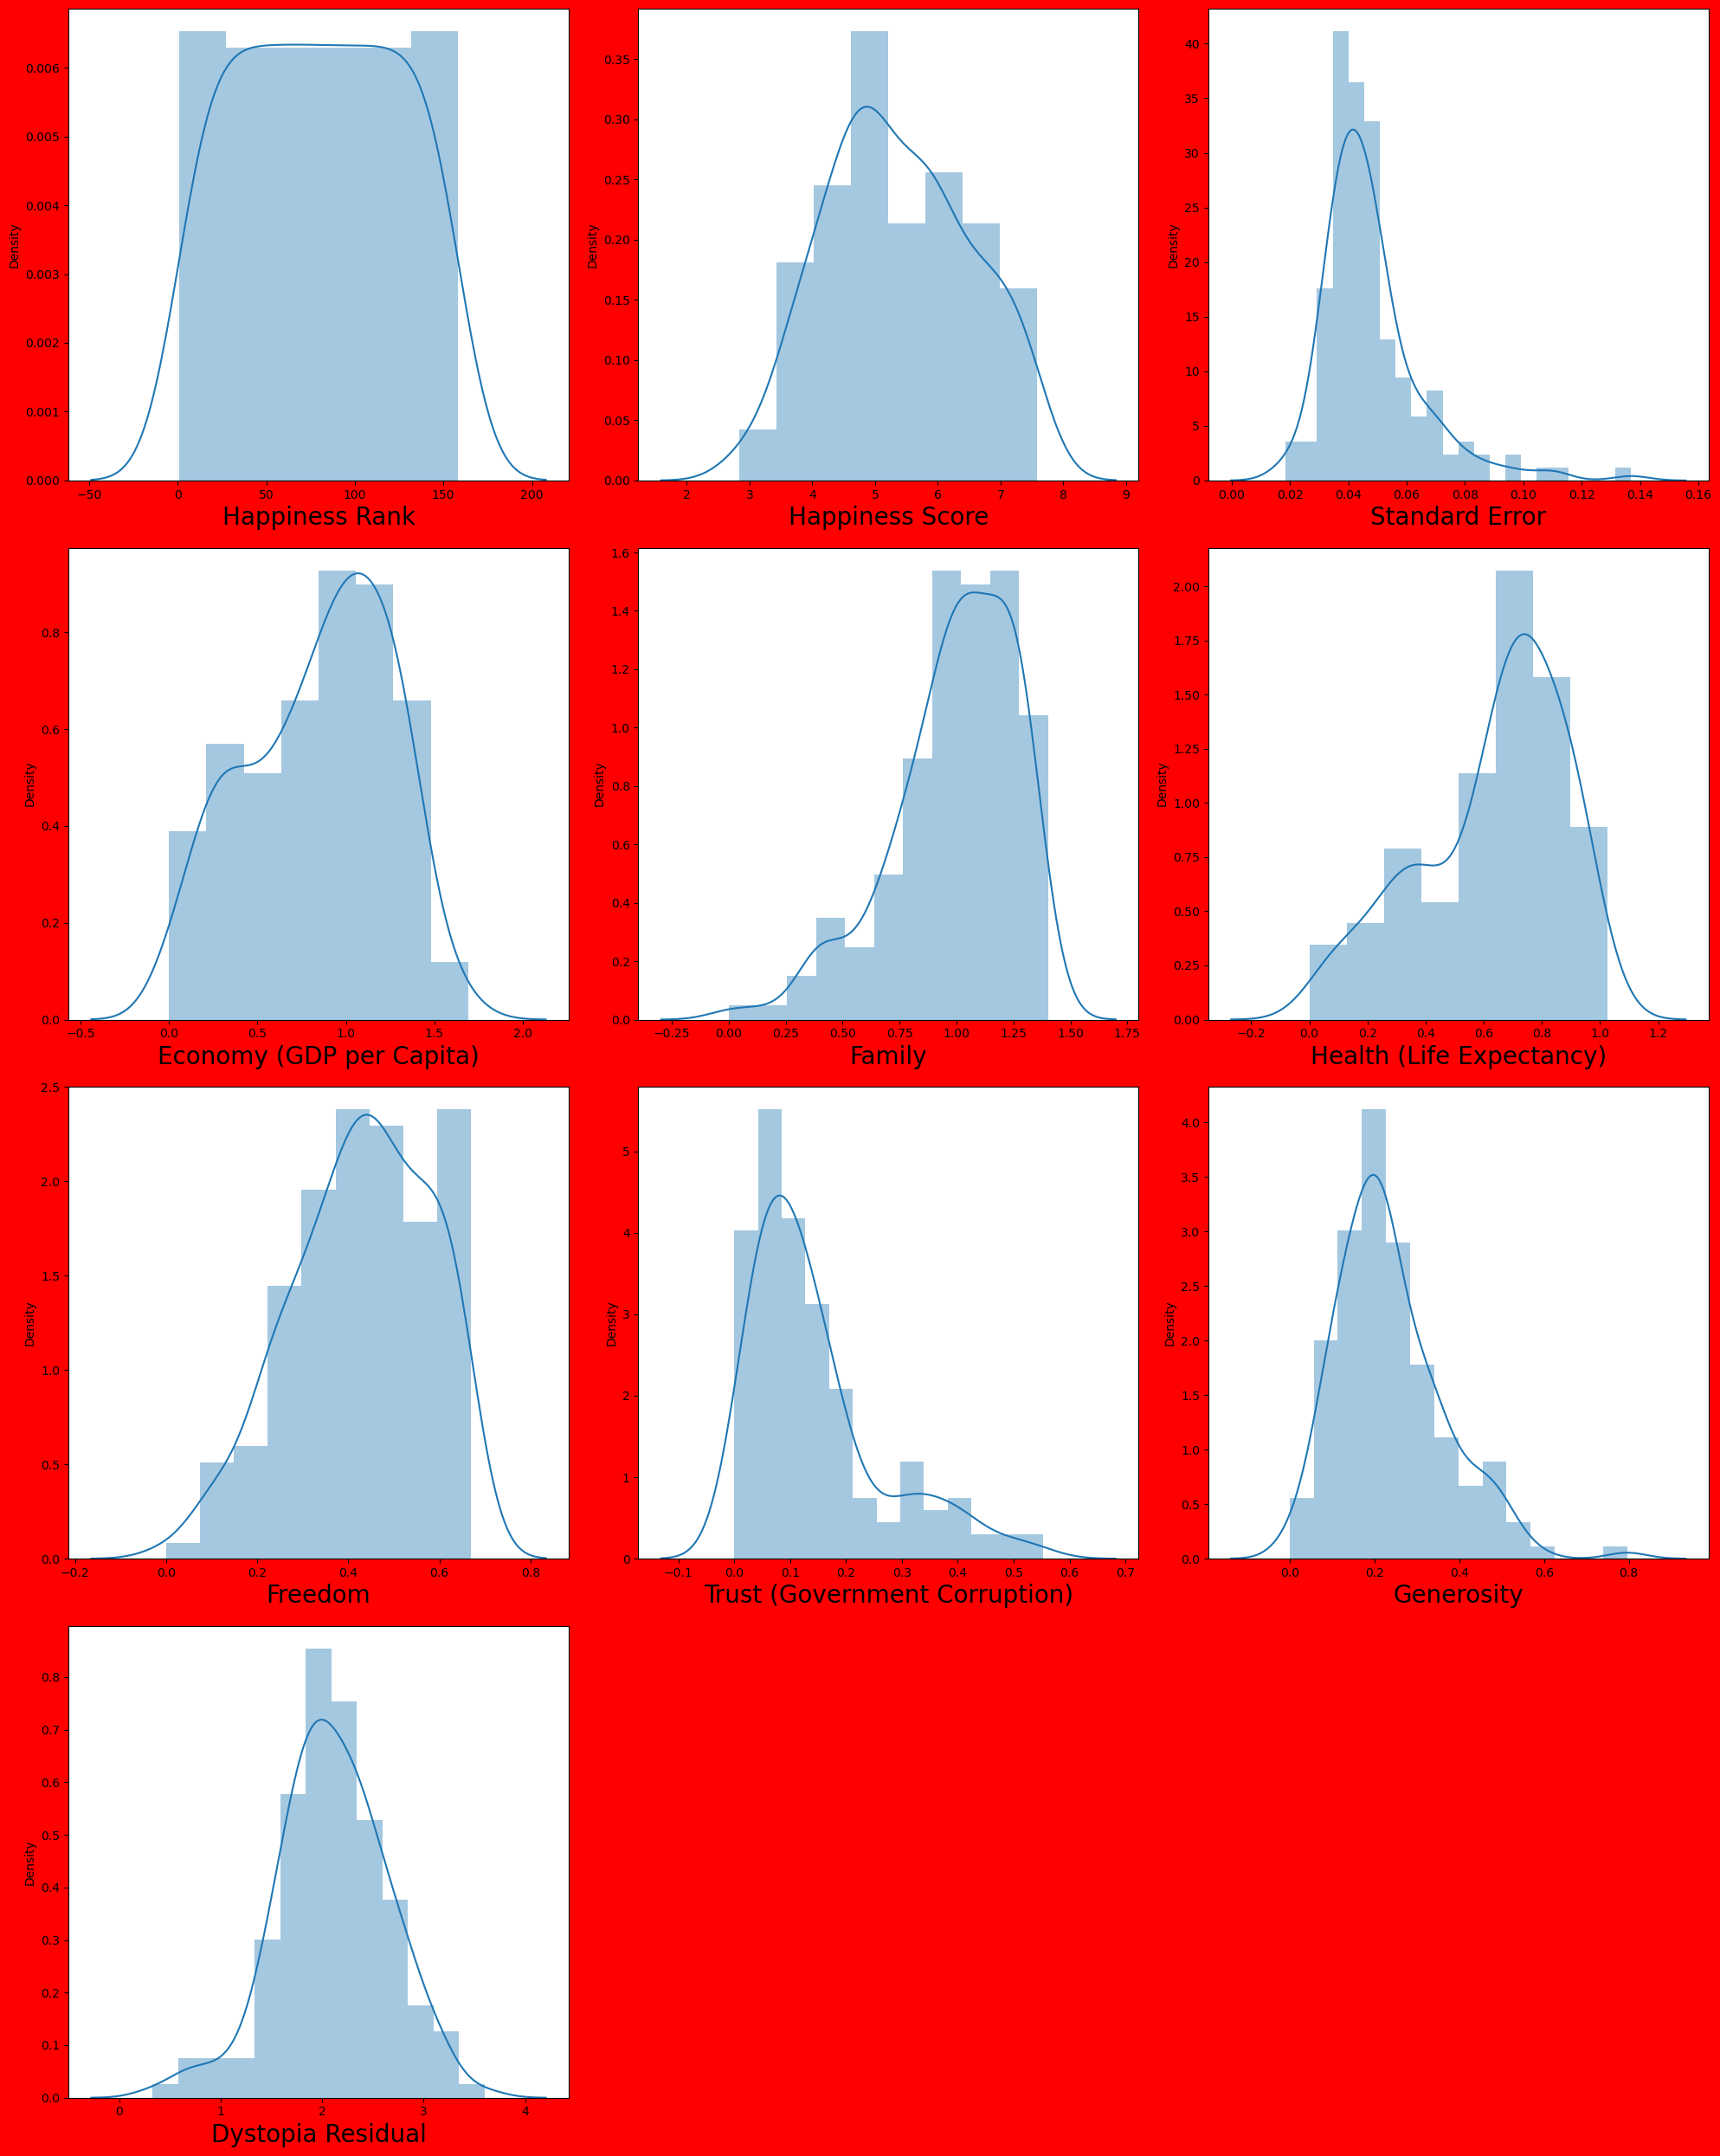

In [10]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in Happy:
    if plotnumber<=10:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(Happy[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

In [13]:
data= Happy.drop(columns=['Happiness Score'])


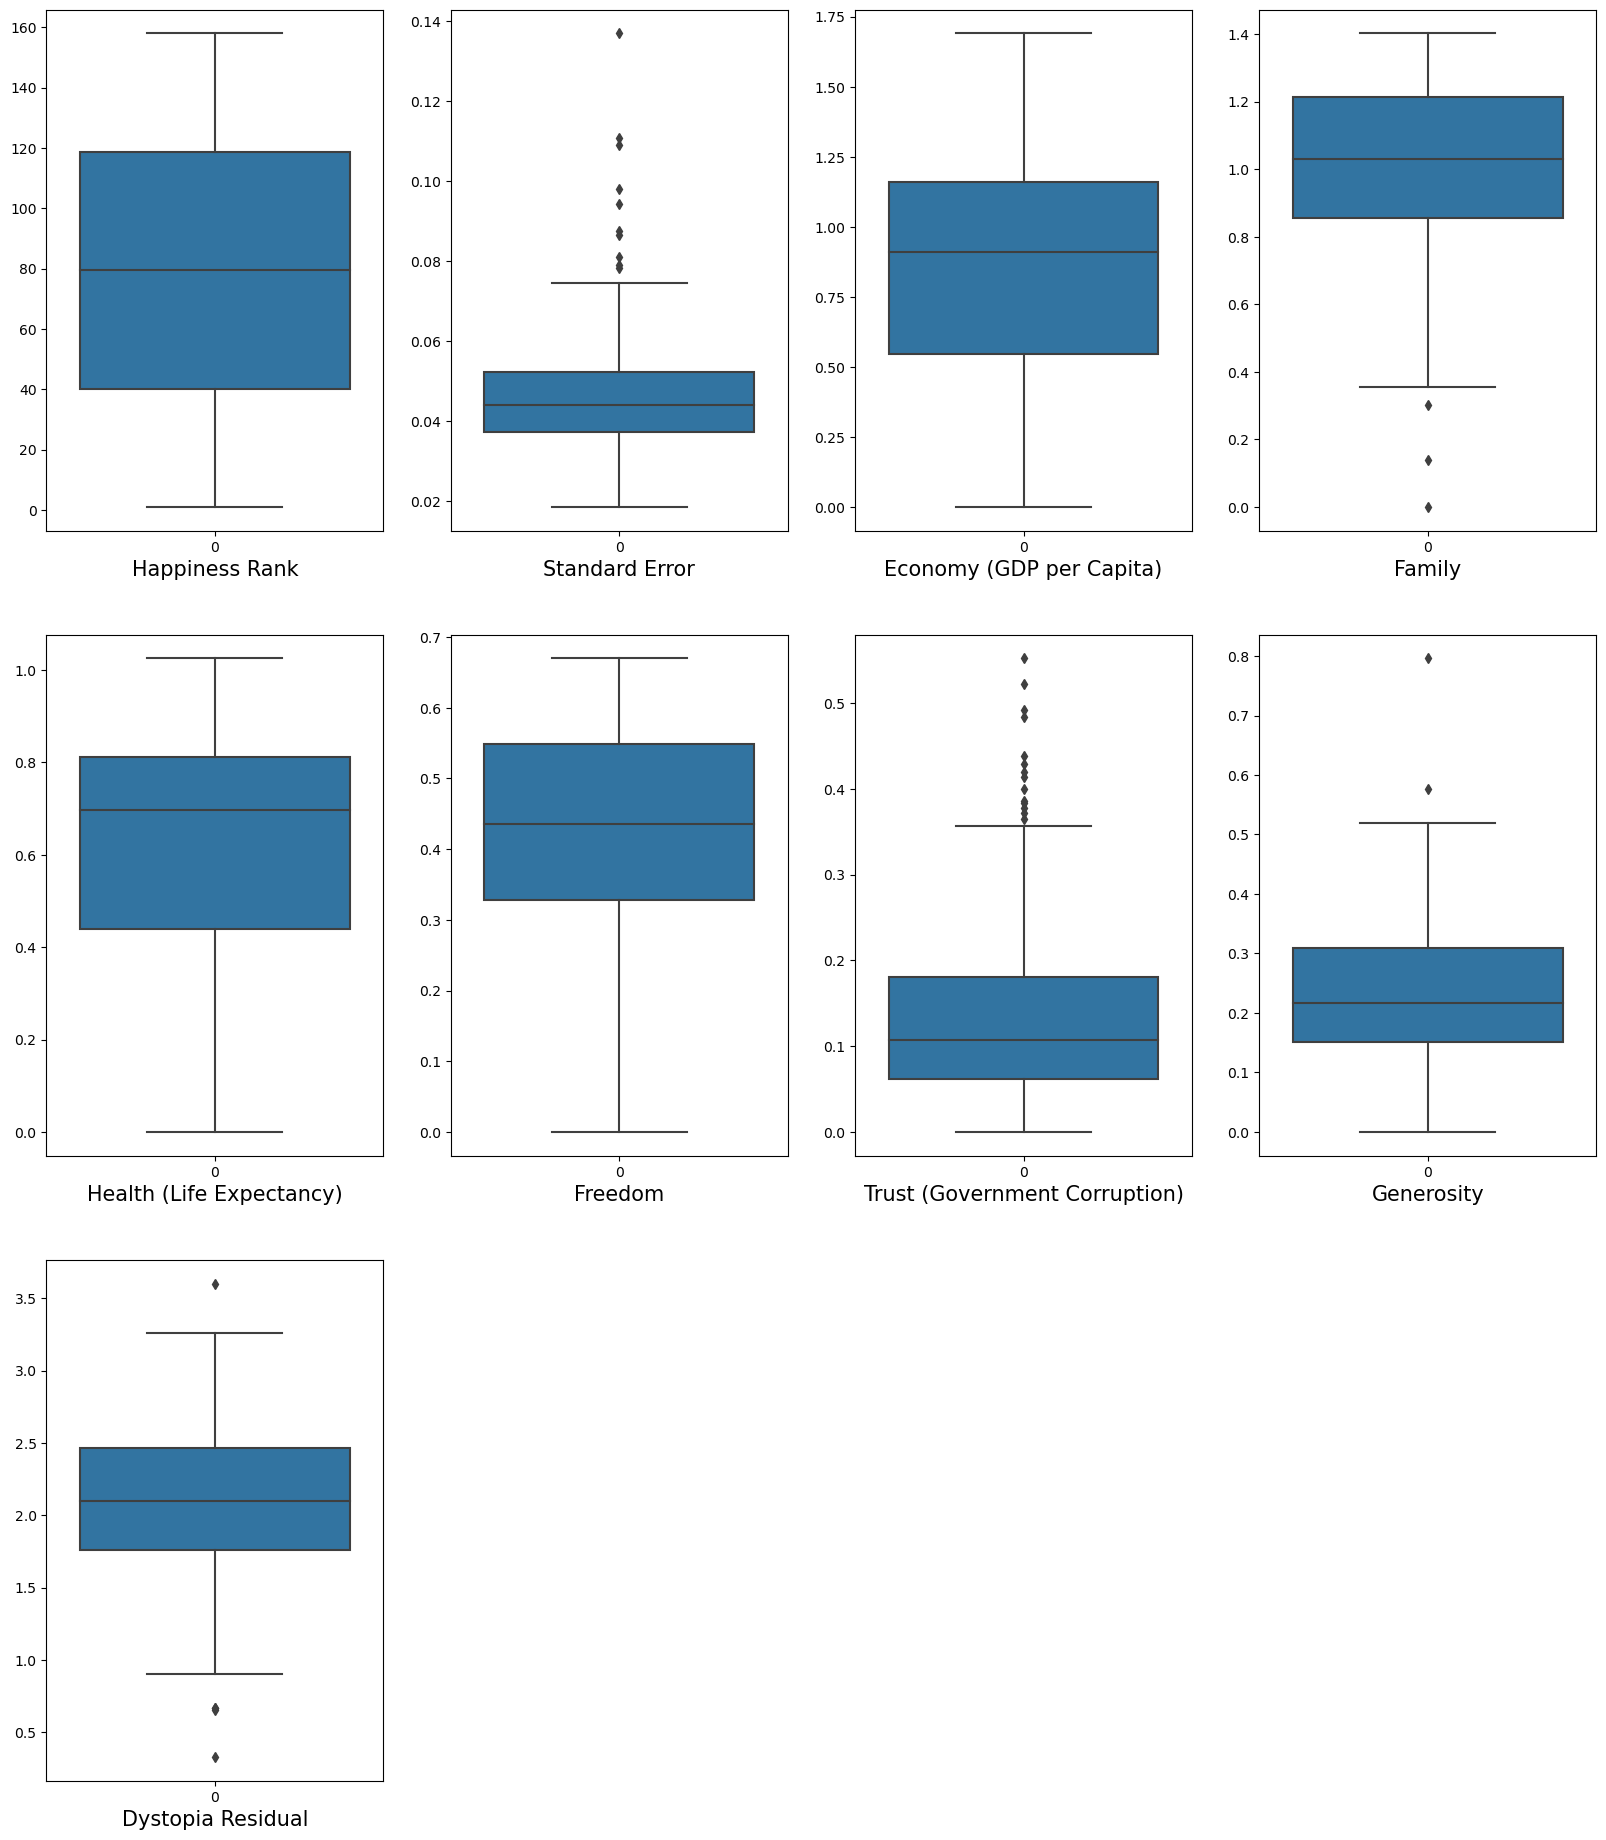

In [14]:
plt.figure(figsize=(20,23))
graph=1
for column in data:
    if graph<=11:
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

In [15]:
data.rename(columns = {'Standard Error':'st_error' ,'Trust (Government Corruption)': 'govt_corr','Dystopia Residual':'dy_resi'}, inplace = True)


In [16]:
data

,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [17]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr= q3-q1

In [18]:
q1

Happiness Rank              40.250000
st_error                     0.037268
Economy (GDP per Capita)     0.545808
Family                       0.856823
Health (Life Expectancy)     0.439185
Freedom                      0.328330
govt_corr                    0.061675
Generosity                   0.150553
dy_resi                      1.759410
Name: 0.25, dtype: float64

In [19]:
dy_resi_low=(q1.dy_resi-(1.5*iqr.dy_resi))
print(dy_resi_low)
index=np.where(data['dy_resi']<dy_resi_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.7049024999999998
(154, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
149,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
152,156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [20]:
dy_resi_high=(q3.dy_resi+(1.5*iqr.dy_resi))
print(dy_resi_high)
index=np.where(data['dy_resi']>dy_resi_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

3.5169225
(153, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
148,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
149,152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
150,154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
151,156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
Generosity_high=(q3.Generosity+(1.5*iqr.Generosity))
print(Generosity_high)
index=np.where(data['Generosity']>Generosity_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.5488775
(151, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
146,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
147,152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
148,154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
149,156,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [22]:
st_error_high=(q3.st_error+(1.5*iqr.st_error))
print(st_error_high)
index=np.where(data['st_error']>st_error_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.07484874999999999
(141, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
136,150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
137,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
138,152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
139,154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [23]:
govt_corr_high=(q3.govt_corr+(1.5*iqr.govt_corr))
print(govt_corr_high)
index=np.where(data['govt_corr']>govt_corr_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.35812499999999997
(129, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...
124,150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
125,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
126,152,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
127,154,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [24]:
bp_low=(q1.Family-(1.5*iqr.Family))
print(bp_low)
index=np.where(data['Family']<bp_low)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

0.32044875000000017
(126, 9)


,index,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
0,1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
1,4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
2,6,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
3,9,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
4,10,11,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...,...
121,148,149,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
122,149,150,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
123,150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
124,151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


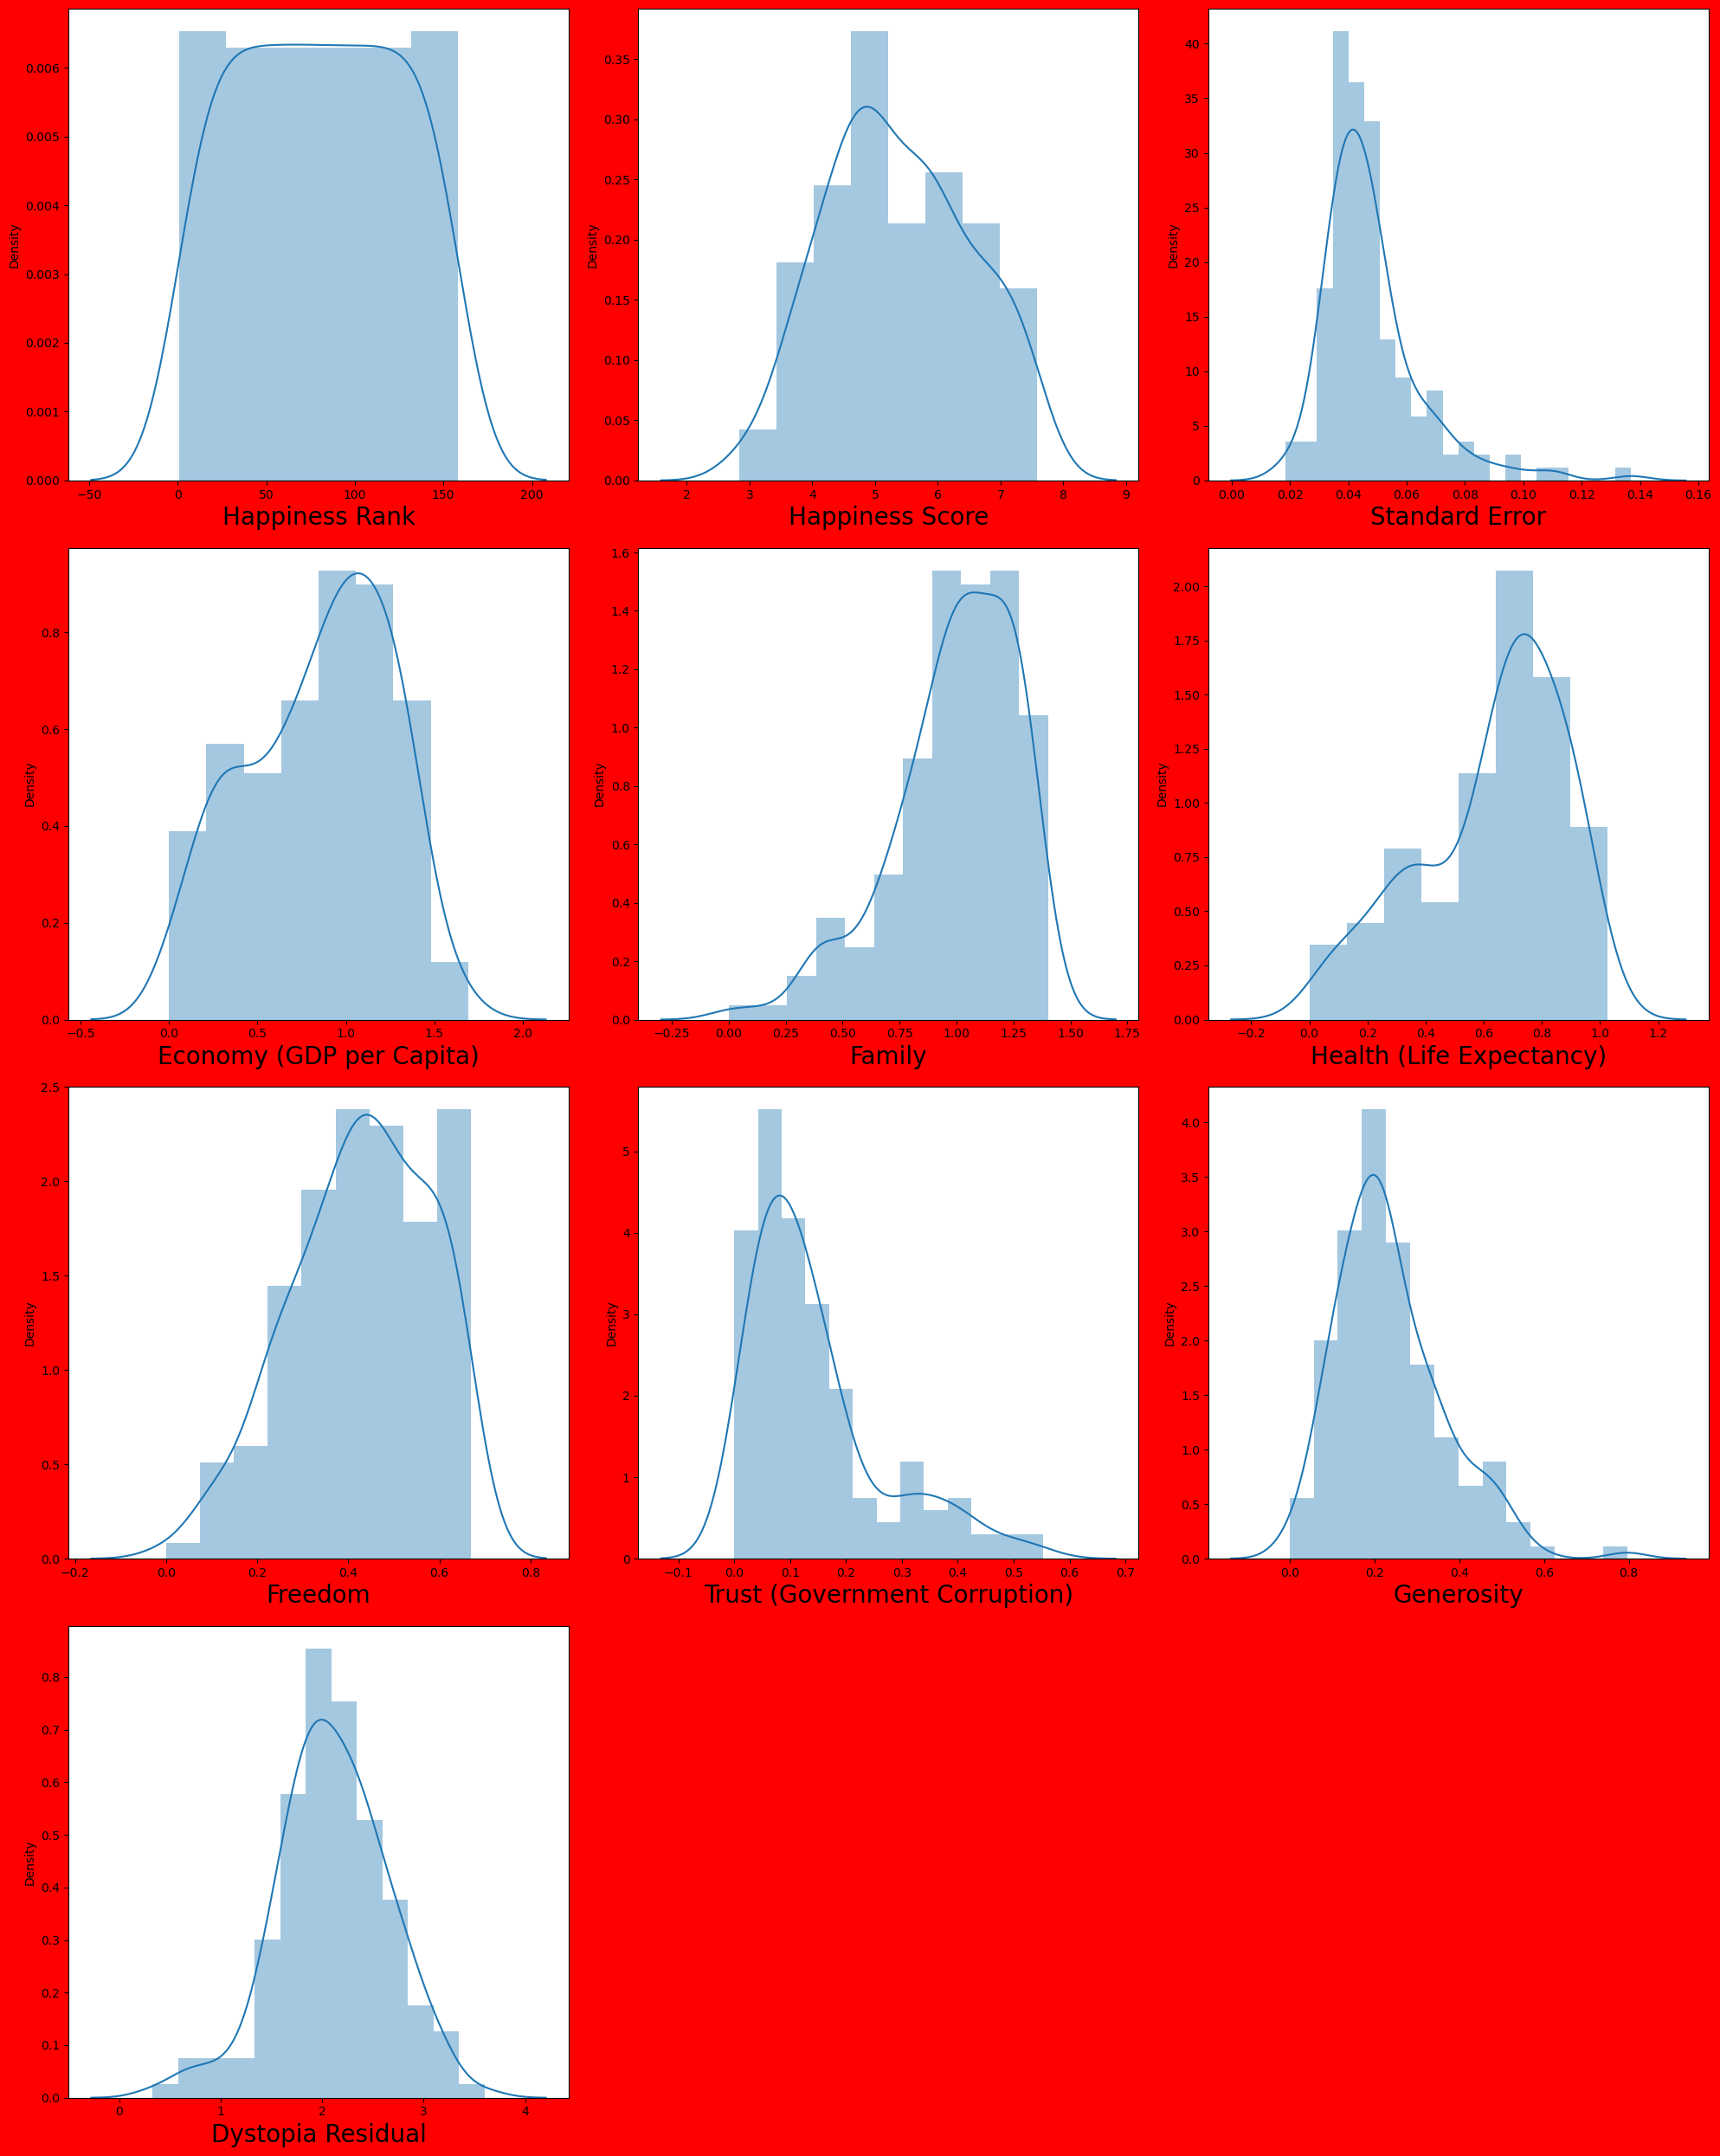

In [25]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1
for column in Happy:
    if plotnumber<=10:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(Happy[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
    
plt.tight_layout()

In [26]:
data

,Happiness Rank,st_error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,govt_corr,Generosity,dy_resi
1,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
4,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
6,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
9,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646
10,11,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
...,...,...,...,...,...,...,...,...,...
148,149,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,150,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494


In [27]:
### finding relationship(features vs label)
X= Happy.drop(columns=['Happiness Score'])
y= Happy['Happiness Score']

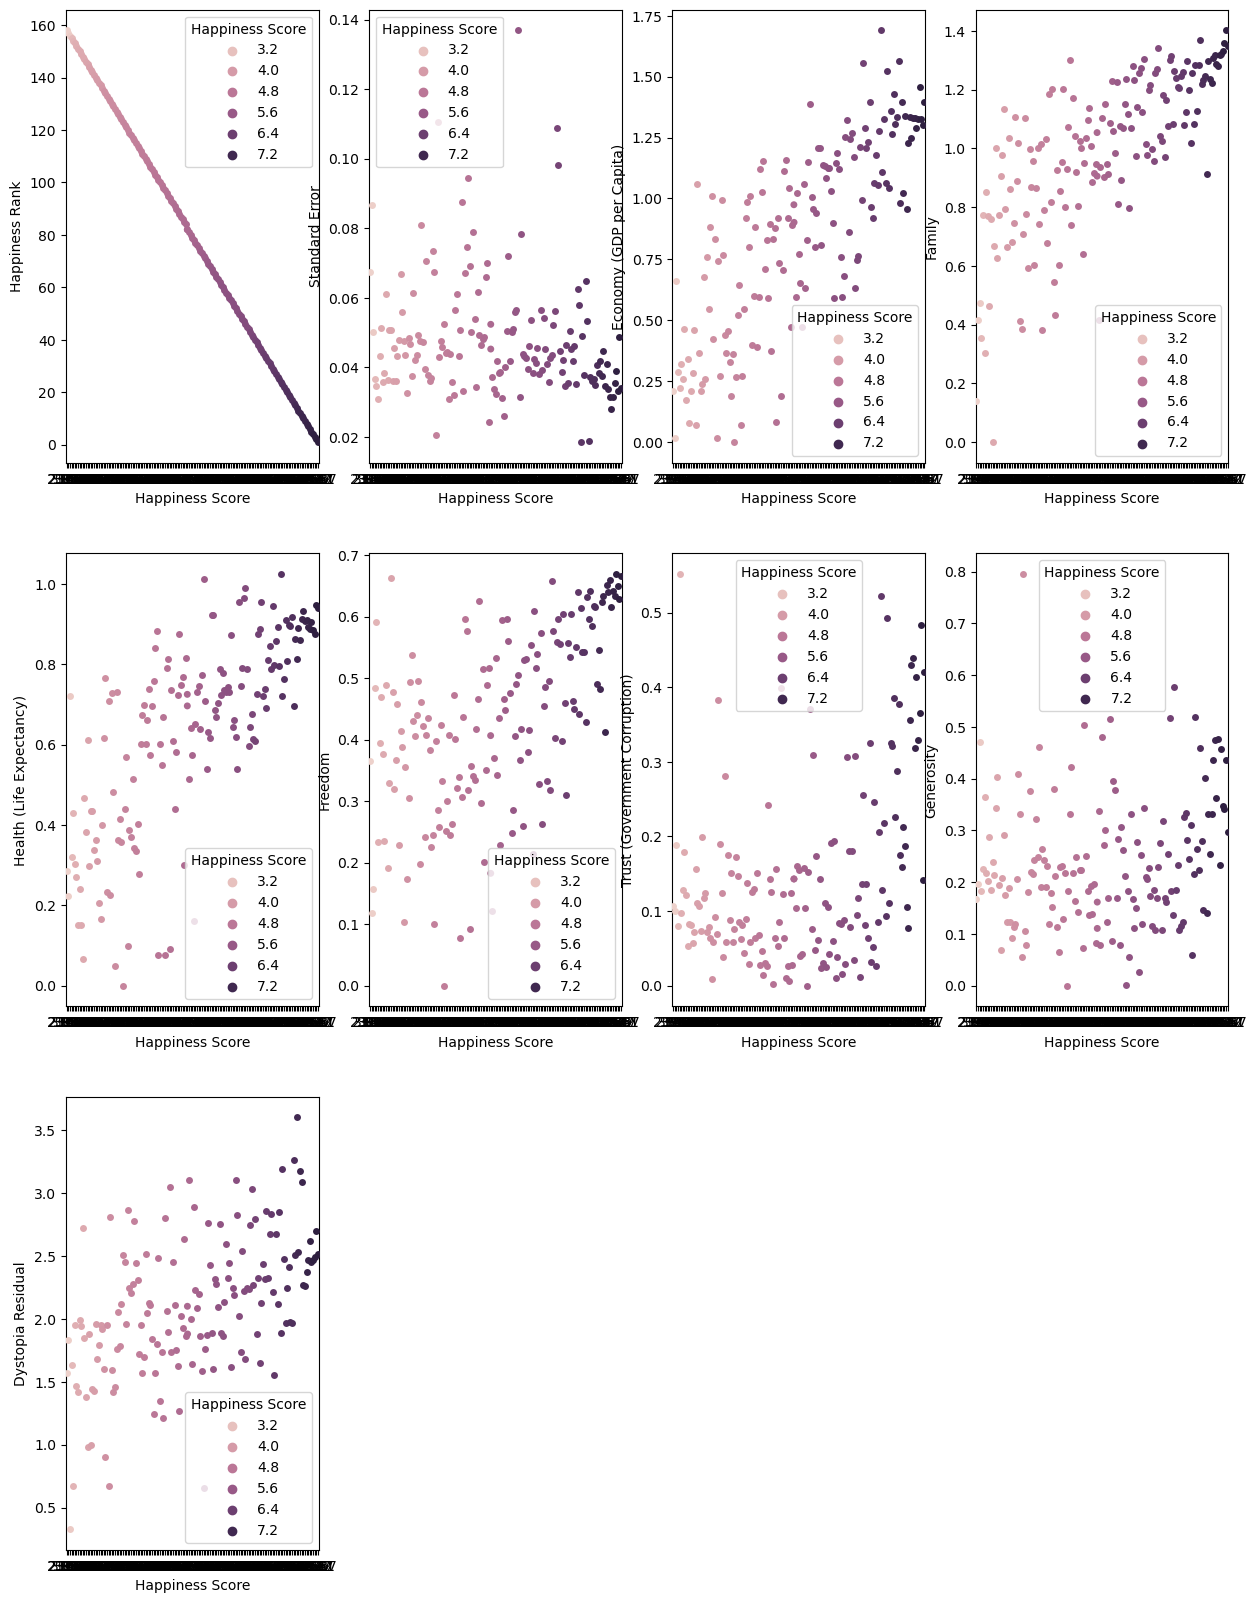

In [31]:
plt.figure(figsize=(15,20))
plotnumber = 1
for column in X:
    if plotnumber <=12:
        ax = plt.subplot(3,4, plotnumber)
        sns.stripplot(x=y, y=X[column],hue=y)
    plotnumber+=1
plt.show()

In [29]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled.shape[1]

9

In [32]:
x_train, x_test,y_train, y_test= train_test_split(X_scaled,y,test_size=0.25, random_state=348)
y_train.head()

48    5.960
76    5.286
90    5.057
44    5.995
56    5.828
Name: Happiness Score, dtype: float64

In [33]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [36]:
regression.score(x_train,y_train)

0.999999948500433

In [37]:
regression.score(x_test,y_test)

0.9999999087081923

In [38]:
x_test[1]

array([ 0.36190677,  1.24300617, -0.03460857, -0.26476765,  0.65186411,
       -2.23788968, -1.17967045,  0.08539914, -0.06398527])

In [39]:
y_pred=regression.predict(x_test)

In [40]:
y_pred

array([5.10165411, 4.94869302, 6.5050961 , 4.2965201 , 4.60971043,
       6.13019625, 6.26932996, 6.61127424, 7.36356833, 6.75011187,
       4.34988755, 4.51221903, 5.68869777, 5.07330772, 5.124177  ,
       6.12284637, 3.78081762, 4.71472816, 4.68553319, 4.87427582,
       6.2981637 , 4.73852793, 4.97123333, 4.50728477, 7.11950245,
       7.28395029, 5.83268792, 5.77044664, 3.8964794 , 5.94818462,
       3.34006214, 4.57143782, 4.87601191, 6.66968151, 5.47708147,
       5.47373818, 5.12897563, 4.78789188, 4.85747611, 4.51710359])

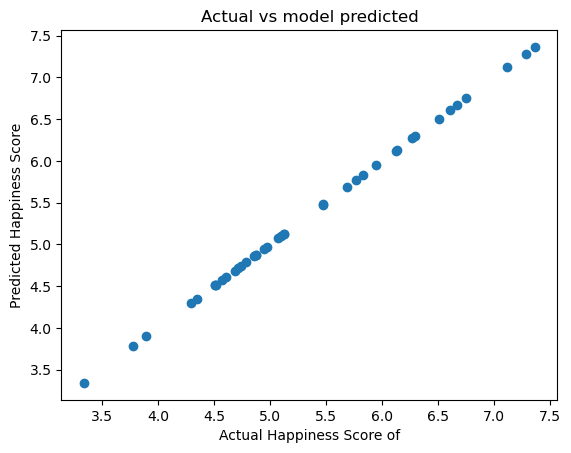

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score of')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs model predicted')
plt.show()

In [42]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error

In [43]:
y_pred=regression.predict(x_test)

In [44]:
mean_absolute_error(y_test,y_pred)

0.0002586479263959607

In [45]:
mean_squared_error(y_test,y_pred)

8.710860685984283e-08

In [46]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002951416725232864

In [50]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [51]:
lasscv=LassoCV(alphas= None, max_iter=10)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=10)

In [52]:
alpha=lasscv.alpha_
alpha

0.00122529493024928

In [53]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train, y_train)

Lasso(alpha=0.00122529493024928)

In [54]:
lass_reg.score(x_test, y_test)

0.9999743338566512